#scRNA Tutorials(Official Tutorials) - Guided Clustering Tutorial
In this tutorials, we will run the standard single-cell RNA analysis workflow exhibited in [official website](https://satijalab.org/seurat/articles/pbmc3k_tutorial)(click to view the full documentation) by using [3k-pbmc dataset](https://cf.10xgenomics.com/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz), which is freely available from 10X Genomics. It contains 2,700 single cells that were sequenced on the Illumina NextSeq 500.



##Step0: Install packages
Firstly, you should install the package `Seurat`. To install Seurat, [R](https://www.r-project.org/) version 4.0 or greater is required. This workflow is derived from the official installation tutorial: [Installation Instructions for Seurat](https://satijalab.org/seurat/articles/install_v5)



### Install from CRAN
The `Seurat` library is now upload into CRAN, you can use command `install.packages(Seruat)` to install `Seurat` library. Then execute `library(Seurat)` to load the dependent library into R global environment and check whether is `Seurat` library is installed or not.

In [ ]:
install.packages('Seurat')
library(Seurat)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘dotCall64’, ‘gtools’, ‘caTools’, ‘plyr’, ‘tensor’, ‘BH’, ‘sitmo’, ‘sp’, ‘spam’, ‘globals’, ‘listenv’, ‘parallelly’, ‘zoo’, ‘lazyeval’, ‘crosstalk’, ‘RcppTOML’, ‘here’, ‘gplots’, ‘reshape2’, ‘gridExtra’, ‘RcppArmadillo’, ‘spatstat.data’, ‘spatstat.univar’, ‘spatstat.random’, ‘spatstat.utils’, ‘spatstat.sparse’, ‘goftest’, ‘abind’, ‘deldir’, ‘polyclip’, ‘FNN’, ‘dqrng’, ‘SeuratObject’, ‘cowplot’, ‘fastDummies’, ‘fitdistrplus’, ‘future’, ‘future.apply’, ‘ggrepel’, ‘ggridges’, ‘ica’, ‘igraph’, ‘irlba’, ‘leidenbase’, ‘lmtest’, ‘matrixStats’, ‘patchwork’, ‘pbapply’, ‘plotly’, ‘png’, ‘progressr’, ‘RANN’, ‘RcppAnnoy’, ‘RcppHNSW’, ‘reticulate’, ‘ROCR’, ‘RSpectra’, ‘Rtsne’, ‘scattermore’, ‘sctransform’, ‘spatstat.explore’, ‘spatstat.geom’, ‘uwot’, ‘RcppEigen’, ‘RcppProgress’


Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 16

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.rstudio.com/src/contrib/fitdistrplus_1.2-2.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘fitdistrplus’ failed”


###Install deveploment version from github

Install the development version of Seurat - directly from [GitHub](https://github.com/satijalab/seurat/tree/develop).

In [ ]:
# Enter commands in R (or R studio, if installed)
# Install the remotes package
install.packages('remotes')
# remotes::install_github(repo = 'satijalab/seurat', ref = 'develop') # to execute this line, remove the notation `#`
library(Seurat)

###Install from Docker
If you are fimilar with Docker container and do not want to pollute the computer system environment and configuration, you can pull the docker images.

- To pull the latest image from the command line:
  - `docker pull satijalab/seurat:latest`
- To use as a base image in a new Dockerfile:
  - `FROM satijalab/seurat:latest`  

### Download the pbmc3k dataset from website



In [ ]:
# system("apt-get install -y -qq software-properties-common python-software-properties module-init-tools")
# system("add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null")
# system("apt-get update -qq 2>&1 > /dev/null")
# system("apt-get -y install -qq google-drive-ocamlfuse")

In [ ]:
# create and change into directory
system("mkdir -p /content/data/scrna")
system("cd /content/data/scrna")

[1] "/content"

In [ ]:
# download the dataset by `wget` command
system2(
  command = "wget",
  args = c("-P", "/content/data/scrna", "https://cf.10xgenomics.com/samples/cell/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz")
)


In [ ]:
# check whether the dataset is downloaded successfully
system("ls /content/data/scrna", intern = TRUE)
# unzip the .gz suppressed dataset into specified folder
system("tar -zxvf /content/data/scrna/pbmc3k_filtered_gene_bc_matrices.tar.gz -C /content/data/scrna", intern = TRUE)

[1] "filtered_gene_bc_matrices"              
[2] "pbmc3k_filtered_gene_bc_matrices.tar.gz"

[1] "filtered_gene_bc_matrices/"                 
[2] "filtered_gene_bc_matrices/hg19/"            
[3] "filtered_gene_bc_matrices/hg19/matrix.mtx"  
[4] "filtered_gene_bc_matrices/hg19/genes.tsv"   
[5] "filtered_gene_bc_matrices/hg19/barcodes.tsv"

## Step1: Reading data into work global environment

In [1]:
library(dplyr)
library(Seurat)
library(patchwork)
setwd("/content/data/scrna")
print(paste0("The current work foder is ",getwd()))

# Read pmbc data from work directory
pbmc.data <- Read10X(data.dir = "filtered_gene_bc_matrices/hg19/")

# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)
pbmc


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




ERROR: Error in library(Seurat): there is no package called ‘Seurat’


What does data in a count matrix look like?

Note: The matrix data can be inquired through `.data` of `seurat` object. The **row** and **columns** of the matrix data are **gene name** and **cell indentification**, respectively.


In [ ]:
# Lets examine a few genes in the first thirty cells
pbmc.data[c("CD3D", "TCL1A", "MS4A1"), 1:30]

Note: The `.` values in the matrix represent 0s (no molecules detected). Since most values in an scRNA-seq matrix are 0, Seurat uses a **sparse-matrix representation** whenever possible. This results in **significant memory and speed savings** for Drop-seq/inDrop/10x data.

In [ ]:
# Here we can compare the dense vs. parse matrix bytes store in memory.
# compute the memory of dense matrix
dense.size <- object.size(as.matrix(pbmc.data))
print(paste("the bytes of dense matrix: ", dense.size))

# compute the memory of parse matrix
sparse.size <- object.size(pbmc.data)
print(paste("The bytes of sparse matrix: ", sparse.size))

## Step2: Standard pre-processing workflow

Single-cell RNA-sequencing has revolutionized the study of cellular heterogeneity by enabling the analysis of gene expression at the single-cell level. However, raw scRNA-seq data is often noisy, sparse, and contains technical artifacts, making it challenging to extract biologically meaningful insights. A standardized pre-processing workflow is essential to clean, normalize, and prepare the data for downstream analysis. Below is an overview of the key steps in a standard pre-processing workflow for scRNA-seq data:



### QC and selecting cells for further analysis
Seurat allows you to easily explore QC metrics and filter cells based on any user-defined criteria:
- The number of unique genes detected in each cell.
  - Low-quality cells or empty droplets will often have very few genes
  - Cell doublets or multiplets may exhibit an aberrantly high gene count
- Similarly, the total number of molecules detected within a cell (correlates strongly with unique genes).
- The percentage of reads that map to the **mitochondrial** genome.  
  - Low-quality / dying cells often exhibit extensive mitochondrial contamination.
  - We calculate mitochondrial QC metrics with the `PercentageFeatureSet()` function, which calculates the percentage of counts originating from a set of features
  - We use the set of all genes starting with MT- as a set of mitochondrial genes.

In [ ]:
# The [[]] operator can add columns to object metadata.
# This is a great place to stash QC stats.
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
# show the 10 items of percent of mitocondria.
head(pbmc[["percent.mt"]], 10)

,percent.mt
,<dbl>
AAACATACAACCAC-1,3.0177759
AAACATTGAGCTAC-1,3.7935958
AAACATTGATCAGC-1,0.8897363
AAACCGTGCTTCCG-1,1.7430845
AAACCGTGTATGCG-1,1.2244898
AAACGCACTGGTAC-1,1.6643551
AAACGCTGACCAGT-1,3.8160920
AAACGCTGGTTCTT-1,3.0973451
AAACGCTGTAGCCA-1,1.1764706


Where are QC metrics stored in Seurat?
The number of unique genes and total molecules are automatically calculated during `CreateSeuratObject()`. You can find them stored in the object meta data

In [ ]:
# Show QC metrics for the first 5 cells
head(pbmc@meta.data, 5)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACATACAACCAC-1,pbmc3k,2419,779,3.0177759
AAACATTGAGCTAC-1,pbmc3k,4903,1352,3.7935958
AAACATTGATCAGC-1,pbmc3k,3147,1129,0.8897363
AAACCGTGCTTCCG-1,pbmc3k,2639,960,1.7430845
AAACCGTGTATGCG-1,pbmc3k,980,521,1.2244898


Where the first column `orig.ident` indicate the data soruce of each cell. The second column and third column exhibites the `nCount_RNA` and `nFeature_RNA`. Here is the comparation explantation in detail:

|                    | Definition| Calculation                                                | Usage                                                        |
| ------------------ | ------------------------------------------------------------ | ---------------------------------------------------------- | ------------------------------------------------------------ |
| **`nCount_RNA`**   | Represents the total number of RNA reads detected in each cell (typically UMI counts, Unique Molecular Identifiers). | It is the **sum of all gene expression values** in a cell. | **Quality Control (QC)**: Helps identify low-quality cells (e.g., cells with low `nCount_RNA` may indicate RNA degradation or low capture efficiency). <br />**Normalization**: Ensures comparability of expression levels across cells. |
| **`nFeature_RNA`** | Represents the number of genes detected in each cell (i.e., the number of genes with non-zero expression values). | It is the **count of non-zero genes** in a cell.           | **Quality Control**: Helps identify low-quality cells (e.g., cells with low `nFeature_RNA` may indicate RNA degradation or low capture efficiency).<br />**Assessing Complexity**: A higher number of expressed genes may indicate greater cellular complexity or diversity in cell types or states. |



In the example below, we visualize QC metrics, and use these to filter cells.
- We filter cells that have unique feature counts over 2,500 or less than 200
- We filter cells that have >5% mitochondrial counts

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


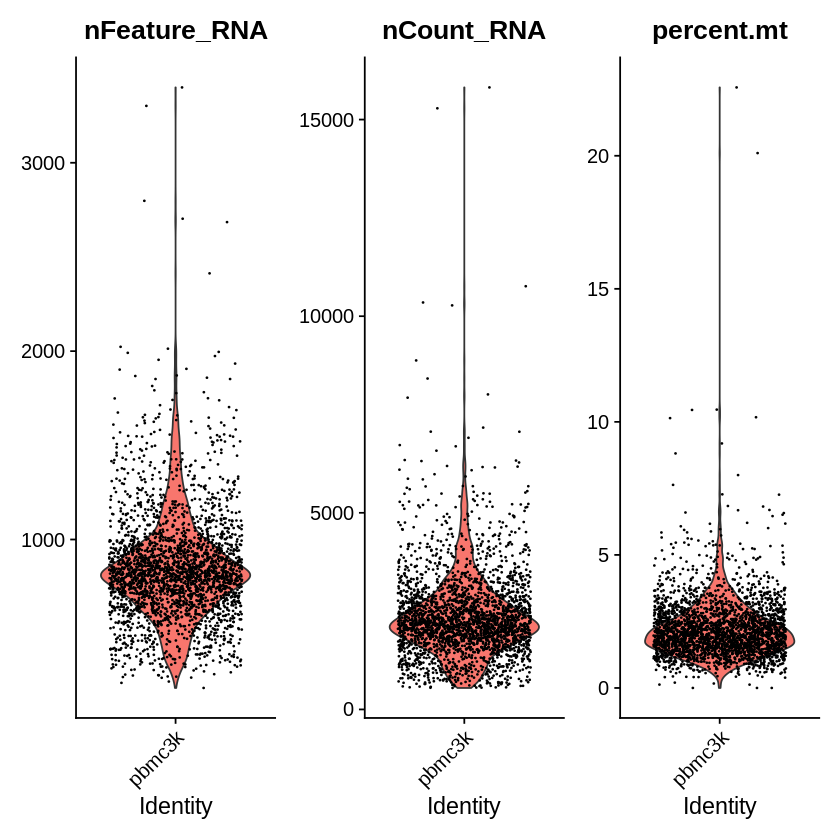

In [ ]:
# Visualize QC metrics as a violin plot
VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

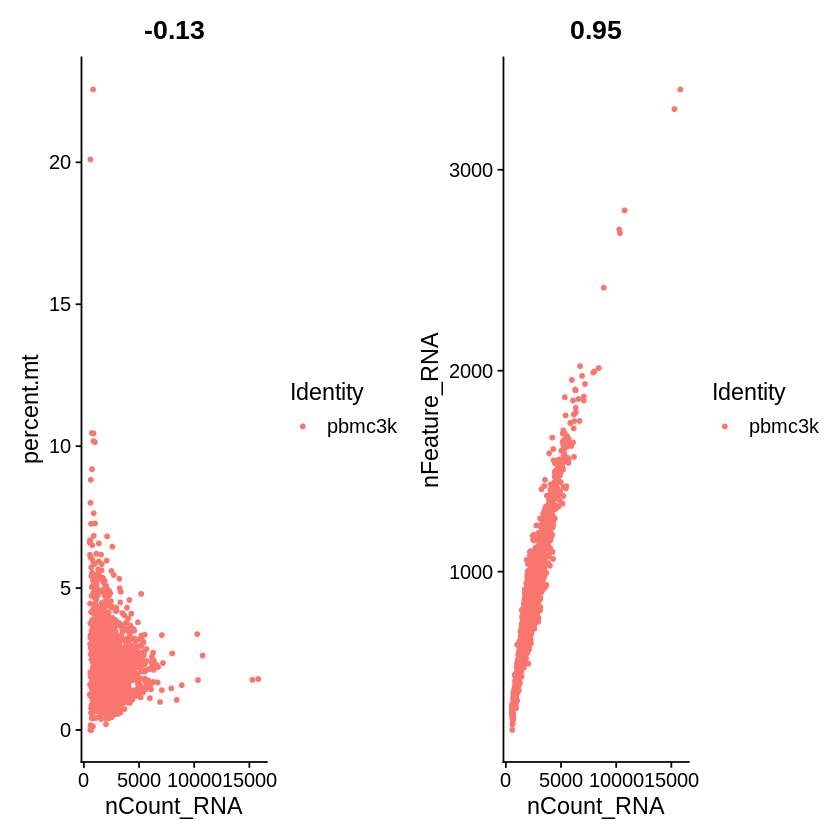

In [ ]:
# FeatureScatter is typically used to visualize feature-feature relationships, but can be used
# for anything calculated by the object, i.e. columns in object metadata, PC scores etc.

plot1 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


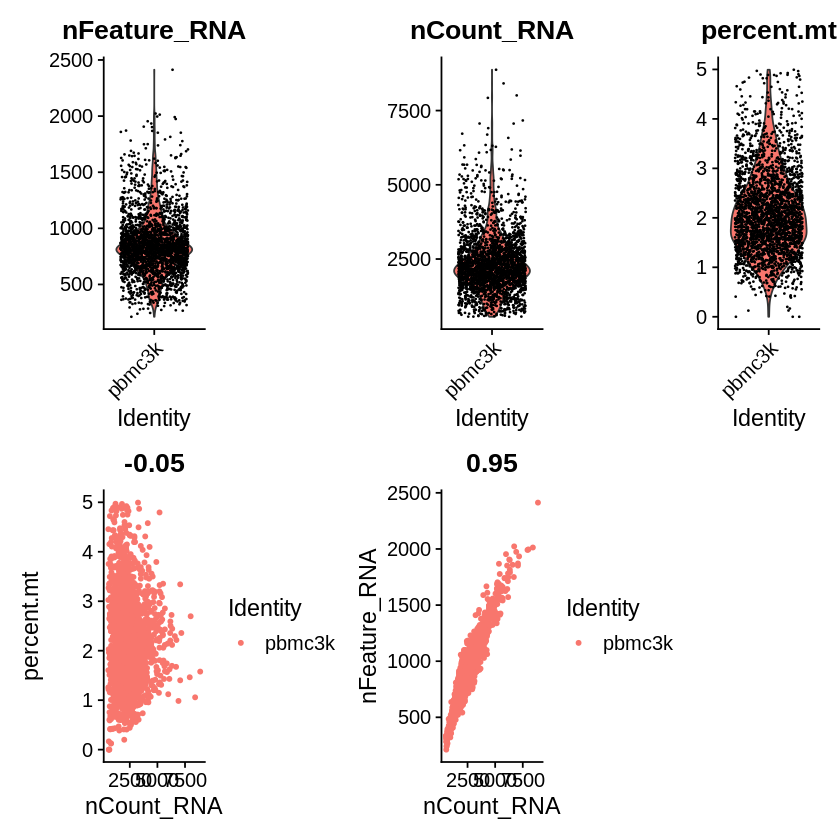

In [ ]:
# keep dataset with feature in the range of 200 and 2500 and mitocondira gene percent less than 5%
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
# Visualization after filter features and percent mitocondria
plot1 <- VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
plot2 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot3 <- FeatureScatter(pbmc, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2 + plot3

### Normalizing the data

Raw count data is subject to technical variability, such as differences in sequencing depth or library preparation efficiency. Normalization methods (e.g., log-normalization, SCTransform, or Seurat’s normalization) are applied to adjust for these technical biases, ensuring that gene expression levels are comparable across cells.

After removing unwanted cells from the dataset, the next step is to normalize the data. By default, we employ a global-scaling normalization method “LogNormalize” that <u>normalizes the feature expression measurements for each cell by the total expression, multiplies this by a scale factor (10,000 by default), and log-transforms the result</u>. In Seurat v5, Normalized values are stored in **`pbmc[["RNA"]]$data`**.

In [ ]:
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000) # the default value of scale.factor is 10000
# pbmc <- NormalizeData(pbmc)

Normalizing layer: counts



### Identification of highly variable features (feature selection)

scRNA-seq datasets are typically high-dimensional, with thousands of genes measured per cell. Feature selection identifies highly variable genes that capture the most biological information, which some genes are highly expressed in some cells, and lowly expressed in others. Dimensionality reduction techniques (e.g., PCA, t-SNE, or UMAP) further simplify the data, enabling visualization and clustering of cells based on their transcriptional profiles.

Our procedure in Seurat is described in detail here, and improves on previous versions by directly modeling the mean-variance relationship inherent in single-cell data, and is implemented in the `FindVariableFeatures()` function. By default, we return **2,000 features** per dataset. These will be used in downstream analysis, like PCA.

Finding variable features for layer counts



[1] "The top 10 most highly variable genes arePPBP, LYZ, S100A9, IGLL5, GNLY, FTL, PF4, FTH1, GNG11, S100A8"


When using repel, set xnudge and ynudge to 0 for optimal results

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


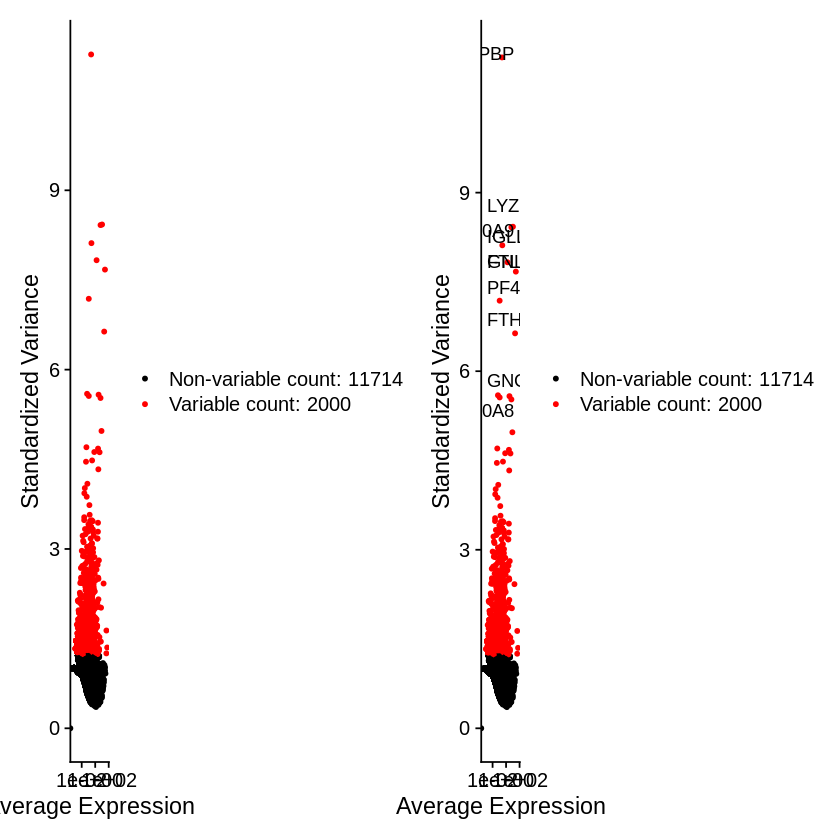

In [ ]:
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top10 <- as.character(head(VariableFeatures(pbmc), 10))
print(paste0("The top 10 most highly variable genes are", paste0(top10, collapse = ", ")))

# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pbmc)
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot1 + plot2

### Scaling the data
Next, we apply a linear transformation (‘scaling’) that is a standard pre-processing step prior to dimensional reduction techniques like PCA.

In [ ]:
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

Warning message:
“No layers found matching search pattern provided”


ERROR: [1m[33mError[39m in `PrepDR5()`:[22m
[33m![39m No layer matching pattern 'scale.data' not found. Please run ScaleData and retry
